In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected=True)

print("All imported!")

All imported!


In [2]:
#read data
#print(pwd)
df = pd.read_csv("Data/Mall_Customers.csv")
print("shape:", df.shape)
print("columns:", df.columns)

shape: (200, 5)
columns: Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [3]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [5]:
df.isnull().sum() #no null, so no missing data

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
plt.style.use("fivethirtyeight")

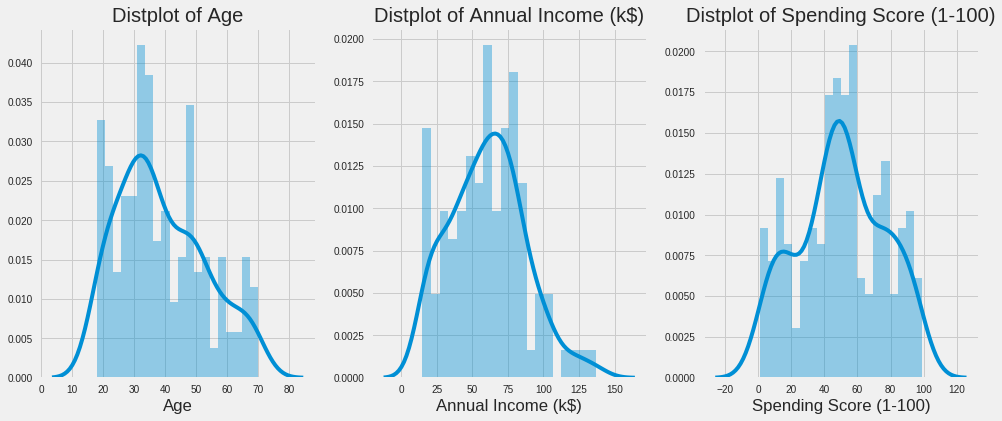

In [7]:
#histograms

plt.figure(1, figsize = (15,6) )
n = 0

for x in ['Age', 'Annual Income (k$)','Spending Score (1-100)']:
    n += 1
    plt.subplot(1,3,n)
    #plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(df[x], bins = 20)
    plt.title("Distplot of {}".format(x))

plt.show()


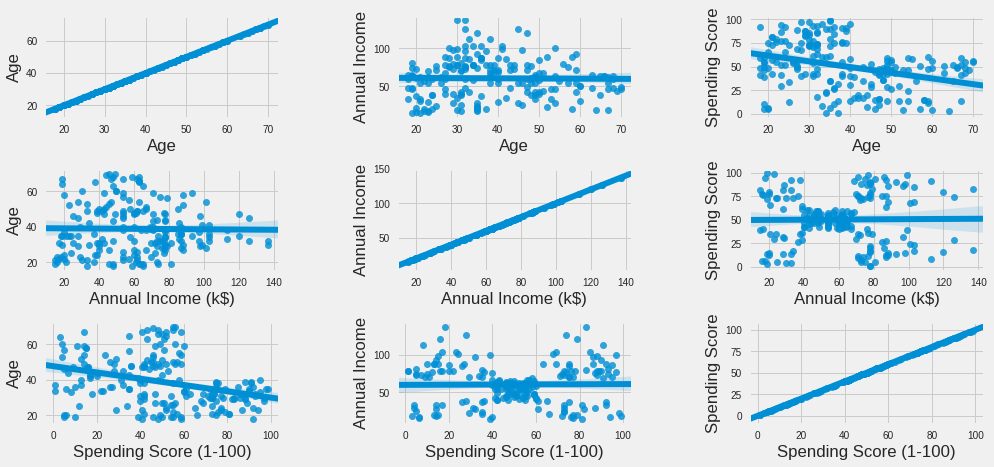

In [8]:
#plotting the relationship between Age, Annual Income, and Spending Score

plt.figure(1, figsize = (15,7) )
n = 0

for x in ['Age', 'Annual Income (k$)','Spending Score (1-100)']:
    for y in ['Age', 'Annual Income (k$)','Spending Score (1-100)']:
        n += 1
        plt.subplot(3,3,n)
        plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
        sns.regplot(x=x, y=y, data=df)
            #regplot plots data and a linear regression model to fit it
        
        #plt.title("Distplot of {}".format(x))
        plt.ylabel(  (y.split()[0] + " " + y.split()[1]) if len(y.split()) > 1 else y)
plt.show()


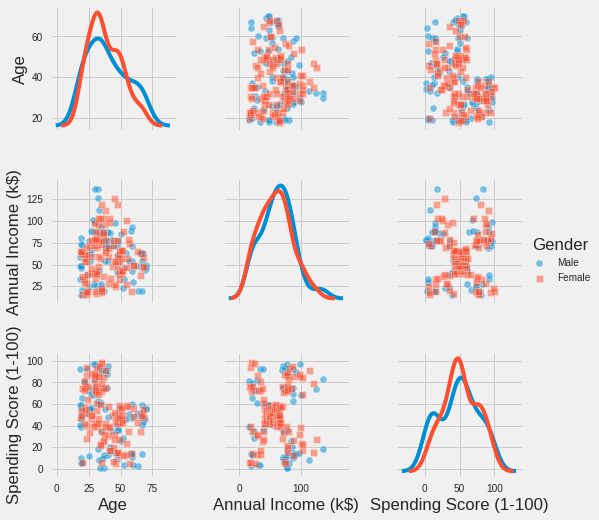

In [9]:
#seaborn pairplot
g = sns.pairplot(df[['Age','Annual Income (k$)','Spending Score (1-100)', 'Gender']], hue = "Gender", markers=["o", "s"], diag_kind="kde", kind = "scatter", plot_kws={'alpha':0.5})

#g = sns.pairplot(df, hue = "Gender")

In [10]:
#shorten the column names
print("old columns:", df.columns)
df.columns = ['CustomerID', 'Gender', 'Age', 'Income','Score']
print("new columns:", df.columns)
print(df.head(5))

old columns: Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')
new columns: Index(['CustomerID', 'Gender', 'Age', 'Income', 'Score'], dtype='object')
   CustomerID  Gender  Age  Income  Score
0           1    Male   19      15     39
1           2    Male   21      15     81
2           3  Female   20      16      6
3           4  Female   23      16     77
4           5  Female   31      17     40


# lets use K-means clustering.

# segmentation using Age and Score

In [11]:
X1 = df[['Age' , 'Score']].iloc[: , :].values
print("X1 shape:",X1.shape)
print("first five:")
print(X1[:5,:])


X1 shape: (200, 2)
first five:
[[19 39]
 [21 81]
 [20  6]
 [23 77]
 [31 40]]


In [12]:
inertia = []
for n in range(1 , 11):
    model = KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') 
    model.fit(X1)
    inertia.append(model.inertia_)

In [13]:
print("inertia:", inertia)

inertia: [171535.5, 75949.156010230174, 45840.676616108671, 28165.583566629339, 23839.439633173846, 19576.013221355326, 15514.19313435103, 13020.333585858585, 11480.045478271728, 10187.846101364521]


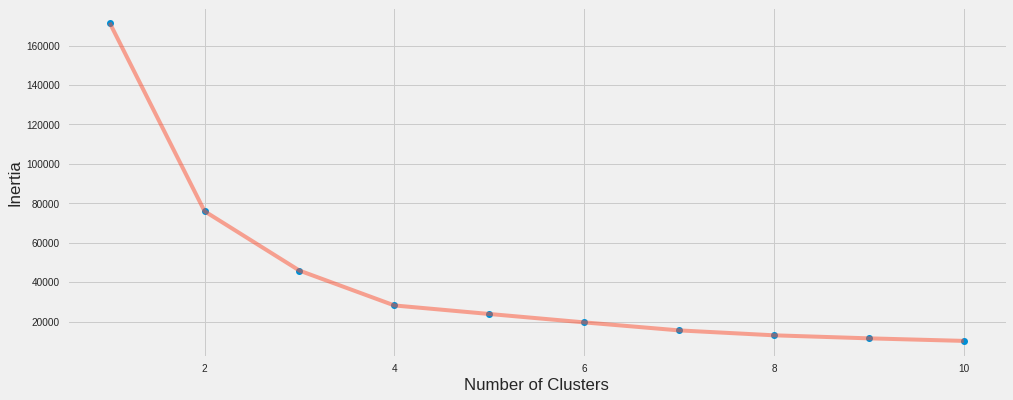

In [14]:
#now try to determine the appropriate number of clusters based on inertia
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-', alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [15]:
#so looks like 4 is a good cluster number. Let's use that.

model = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
model.fit(X1)
labels1 = model.labels_
centroids1 = model.cluster_centers_

#print("labels:", labels1)
print("centroids:", centroids1)

centroids: [[ 27.61702128  49.14893617]
 [ 43.29166667  15.02083333]
 [ 30.1754386   82.35087719]
 [ 55.70833333  48.22916667]]


In [16]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
print("xx shape:", xx.shape)
print("yy shape:", yy.shape)
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) #np.c_ : Translates slice objects to concatenation along the second axis.
print("Z shape:", Z.shape)

xx shape: (5000, 2700)
yy shape: (5000, 2700)
Z shape: (13500000,)


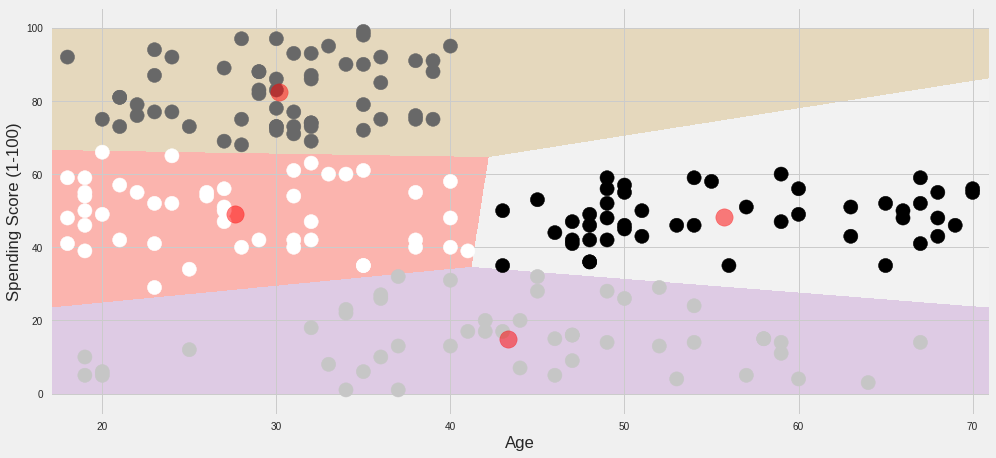

In [17]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf() #clears current figure
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel1, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Score' , data = df , c = labels1 , s = 200 )
#plt.scatter( x = df['Age'] ,y = df['Score'] , c = labels1 , s = 200 ) #same
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

# segmentation based on annual income and spending score

In [27]:
X2 = df[['Income','Score']].iloc[: , :].values
print("X2 shape:",X2.shape)
print("first five:")
print(X2[:5,:])



X2 shape: (200, 2)
first five:
[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]]


In [28]:
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

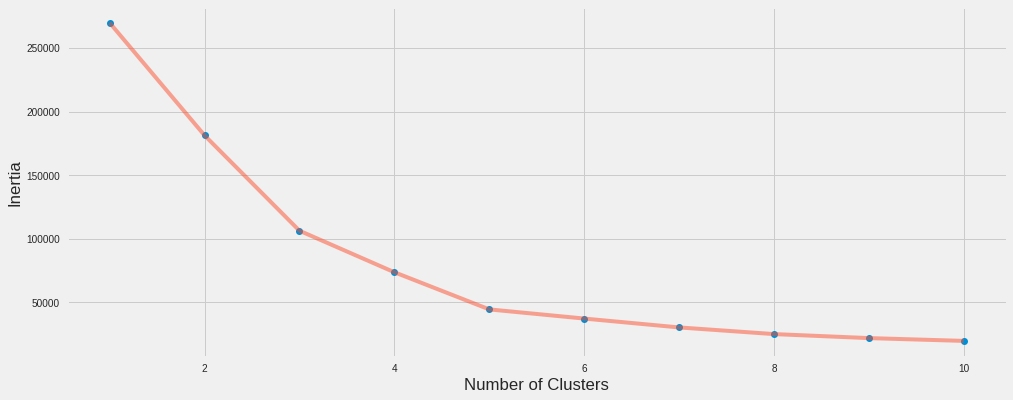

In [29]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

#seems like 5 clusters is a good choice

In [30]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_
print("centroids:", centroids2)

centroids: [[ 25.72727273  79.36363636]
 [ 55.2962963   49.51851852]
 [ 86.53846154  82.12820513]
 [ 88.2         17.11428571]
 [ 26.30434783  20.91304348]]


In [31]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

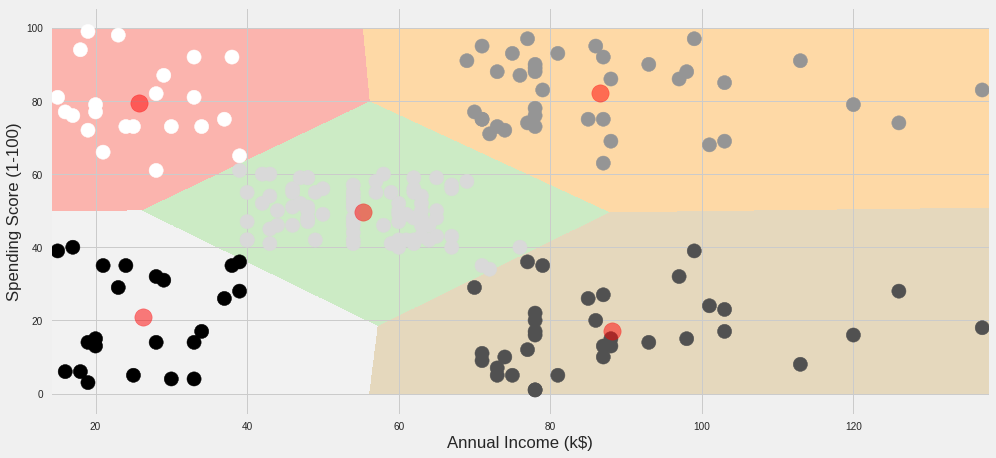

In [32]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel1, aspect = 'auto', origin='lower')

plt.scatter( x = 'Income' ,y = 'Score' , data = df , c = labels2 , 
            s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income (k$)')
plt.show()

# 3.Segmentation using Age , Annual Income and Spending Score

In [33]:
X3 = df[['Age' , 'Income' ,'Score']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

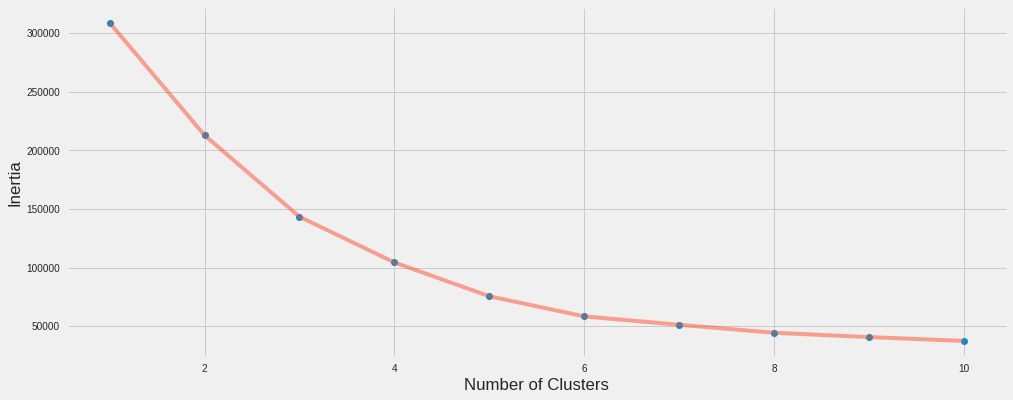

In [34]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

#6 clusters might be okay

In [37]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_
print("centroids3:", centroids3)

centroids3: [[ 27.          56.65789474  49.13157895]
 [ 41.68571429  88.22857143  17.28571429]
 [ 56.15555556  53.37777778  49.08888889]
 [ 32.69230769  86.53846154  82.12820513]
 [ 44.14285714  25.14285714  19.52380952]
 [ 25.27272727  25.72727273  79.36363636]]


In [38]:
df['label3'] =  labels3
trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Score'],
    z= df['Income'],
    mode='markers',
     marker=dict(
        color = df['label3'], 
        size= 20,
        line=dict(
            color= df['label3'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)
print("Done")

Done


In [ ]:
#todo

# use this data for a linear regression.

# Try to predict spending score based on age, income and sex.

# Should be straight-forward.

# Steps:
    
# 1. split the data for train, validation and test.
# 2. apply oneHotEncoder on sex
# 3. Standardize age and income
# 3. Do regression.
# 4. Test. 
